In [1]:

import sys
import os
from time import time
sys.path.append("../../../../src/")

import numpy as np
import numpy.linalg as la
from itertools import combinations
from scipy.linalg import toeplitz
from collections import Counter
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import kblock_ising_model as kb

from scipy.integrate import solve_ivp


#Imports
import single_particle_sector as sps
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, scatter


In [19]:
#Checking Critical scalings:
g = np.linspace(0,.99,200)
L = 200
k = kb.k_vals(L)
parity = False
J = -1
max_n = 6
test = np.empty([len(g)])
#p_data = np.empty([max_n,len(g)])
for gi in range(len(g)):
    U = kb.U(k,g[gi])
    for n in range(1,max_n+1):
      #  p_data[n-1,gi] = kb.P_n(n,U,k,parity)
        test[gi] = kb.sigma_general([1,100],U,k)

popt, _ = curve_fit(scaling_func, g, test)
A = popt
print(A[1])

/Users/kristianmunnikhuis/miniconda3/envs/TFIM/lib/python3.11/site-packages/numpy/linalg/_linalg.py:2383: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/kristianmunnikhuis/miniconda3/envs/TFIM/lib/python3.11/site-packages/numpy/linalg/_linalg.py:2383: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/kristianmunnikhuis/miniconda3/envs/TFIM/lib/python3.11/site-packages/numpy/linalg/_linalg.py:2383: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


KeyboardInterrupt: 

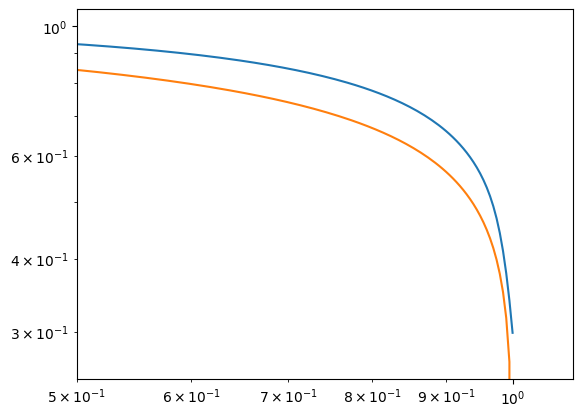

In [5]:
#plt.plot(g,p_data.T)
plt.plot(g,test)
plt.plot(g,(1-g)**(1/4))
plt.xlim(0.5,1.1)
plt.yscale("log")
plt.xscale("log")

In [ ]:
test1 = np.empty([len(g)])

G_gs = []
for gi in g:
    H = sps.H_bdg(gi,L,J,"ABC")
    E,V = la.eigh(H)
    #The only sublety is this step
    #G_TFIM chooses ((1 0),(0 0 )) corr
    G = sps.G_tfim(V[:,L:])
    G_gs.append(G)

for i in range(len(G_gs)):
    G = G_gs[i]
    test1[i] = sps.sigma_general([0,200],G,L)
plot(1-g,test1)
plot(1-g,test)
plot(1-g,np.abs(1-g)**(1/8))

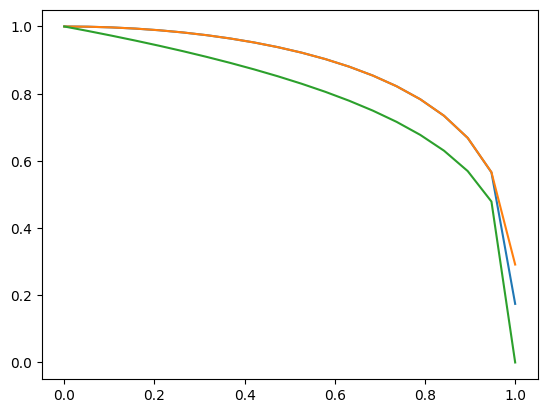

In [154]:
plot(g,test1)
plot(g,test)
plot(g,np.abs(1-g)**(1/4))


In [153]:
for g_i in g:
    H = sps.H_bdg(g_i, L, J, "ABC")
    E, V = la.eigh(H)
    G = sps.G_tfim(V[:, L:])
    print(sps.sigma_general([0, 500], G, L), (1 - g_i)**0.25)


1.0000000000000535 1.0
0.9993067586823119 0.9865741364867494
0.9972183318899192 0.9725766308764144
0.9937081812264824 0.9579472508871494
0.9887305955513348 0.9426151476815119
0.9822182944161277 0.9264961280431517
0.9740786842020789 0.9094889729229877
0.9641882796222828 0.8914703664390793
0.9523844850416786 0.8722877451005959
0.9384533897709996 0.851748936078004
0.9221112623074001 0.8296066547537365
0.9029755893660902 0.8055344092731546
0.8805177861454768 0.7790872728179328
0.8539815867777183 0.7496342354435371
0.8222316416686781 0.7162326270441588
0.7834439418258948 0.6773709971213142
0.7343794647239693 0.6303647413359295
0.6682767065661372 0.5695988432761475
0.5658139237695586 0.4789736254435748
0.15270342809416998 0.0


In [ ]:
from scipy.optimize import curve_fit

def scaling_func(g, A,beta):
    return A**2 * (1 - g)**(2 * beta)  # with beta = 1/8

popt, _ = curve_fit(scaling_func, g, test)
A = popt
A[1]
1/8

/var/folders/tb/9nr_hj116ln_8s6hck886ppc0000gn/T/ipykernel_40841/2290347527.py:4: RuntimeWarning: divide by zero encountered in power
  return A**2 * (1 - g)**(2 * beta)  # with beta = 1/8


np.float64(0.09558339924614498)

0.125